<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/17_3_Time_Based_Learning_Rate_Schedule_Ionosphere_Classi%EF%AC%81cation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ionosphere Classiﬁcation Dataset
The Ionosphere binary classiﬁcation problem is used as a demonstration in this lesson. The dataset describes radar returns where the target was free electrons in the ionosphere. It is a binary classiﬁcation problem where positive cases (g for good) show evidence of some type of structure in the ionosphere and negative cases (b for bad) do not. 

It is a good dataset for practicing with neural networks because all of the inputs are small numerical values of the same scale. There are 34 attributes and 351 observations. State-of-the-art results on this dataset achieve an accuracy of approximately 94% to 98% accuracy using 10-fold cross validation.

 The dataset is available within the code bundle provided with this book. Alternatively, you can download it directly from the UCI Machine Learning repository. Place the data ﬁle in your working directory with the ﬁlename ionosphere.csv. You can learn more about the ionosphere dataset on the UCI Machine Learning Repository website.


# Time-Based Learning Rate Schedule
Keras has a time-based learning rate schedule built in. The stochastic gradient descent optimization algorithm implementation in the SGD class has an argument called decay. This argument is used in the time-based learning rate decay schedule equation as follows:

                 LearningRate = LearningRate X (1 / (1+decay X epoch))

When the decay argument is zero (the default), this has no effect on the learning rate (ex. 0.1).

LearningRate = 0.1 * 1/(1 + 0.0 * 1) 

LearningRate = 0.1


When the decay argument is speciﬁed, it will decrease the learning rate from the previous epoch by the given ﬁxed amount. For example, if we use the initial learning rate value of 0.1 and the decay of 0.001, the ﬁrst 5 epochs will adapt the learning rate as follows:

Epoch Learning Rate 

1     -  0.1

2      - 0.0999000999 

3     -  0.0997006985 

4    -   0.09940249103 

5   -    0.09900646517


The example below demonstrates using the time-based learning rate adaptation schedule in Keras. 

A small neural network model is constructed with a single hidden layer with 34 neurons and using the rectiﬁer activation function. The output layer has a single neuron and uses the sigmoid activation function in order to output probability-like values. 

The learning rate for stochastic gradient descent has been set to a higher value of 0.1. The model is trained for 50 epochs and the decay argument has been set to 0.002, calculated as 0.1/50 . 

Additionally, it can be a good idea to use momentum when using an adaptive learning rate. In this case we use a momentum value of 0.8. The complete example is listed below.


In [23]:
# Time Based Learning Rate Decay
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

In [4]:
# load dataset 
dataframe = pd.read_csv("ionosphere.csv") 
dataset = dataframe.values 
# split into input (X) and output (Y) variables 
X = dataset[:,0:34].astype(float) 
Y = dataset[:,34] 

In [7]:
X[0], Y[0]

(array([ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
         0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
         0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
         0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
         0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
         0.42267, -0.54487,  0.18641, -0.453  ]), 'g')

In [11]:
X.shape, Y.shape

((351, 34), (351,))

In [8]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

In [12]:
# encode class values as integers 
encoder = LabelEncoder() 
encoder.fit(Y) 
Y = encoder.transform(Y) 

In [16]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
# create model 
model = Sequential() 
model.add(Dense(34, input_dim=34, kernel_initializer= 'normal' , activation= 'relu' )) 
model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))

In [18]:
# Compile model 
epochs = 50 
learning_rate = 0.1 
decay_rate = learning_rate / epochs 
momentum = 0.8 
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False) 
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])

In [20]:
# Fit the model 
history = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
 - 0s - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.0834 - val_accuracy: 0.9914
Epoch 2/50
 - 0s - loss: 0.0590 - accuracy: 0.9830 - val_loss: 0.0606 - val_accuracy: 0.9914
Epoch 3/50
 - 0s - loss: 0.0601 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9828
Epoch 4/50
 - 0s - loss: 0.0533 - accuracy: 0.9872 - val_loss: 0.0704 - val_accuracy: 0.9914
Epoch 5/50
 - 0s - loss: 0.0518 - accuracy: 0.9872 - val_loss: 0.0731 - val_accuracy: 0.9914
Epoch 6/50
 - 0s - loss: 0.0505 - accuracy: 0.9872 - val_loss: 0.0707 - val_accuracy: 0.9914
Epoch 7/50
 - 0s - loss: 0.0505 - accuracy: 0.9872 - val_loss: 0.0670 - val_accuracy: 0.9914
Epoch 8/50
 - 0s - loss: 0.0490 - accuracy: 0.9872 - val_loss: 0.0718 - val_accuracy: 0.9914
Epoch 9/50
 - 0s - loss: 0.0489 - accuracy: 0.9872 - val_loss: 0.0662 - val_accuracy: 0.9914
Epoch 10/50
 - 0s - loss: 0.0488 - accuracy: 0.9872 - val_loss: 0.0656 - val_accuracy: 0.9914
Epoch 11/50
 - 0s - los

The model is trained on 67% of the dataset and evaluated using a 33% validation dataset. Running the example shows a classiﬁcation accuracy of 99.14%. This is higher than the baseline of 95.69% without the learning rate decay or momentum.


In [21]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

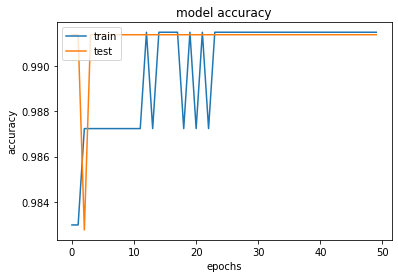

In [24]:
plt.plot(history.history[ 'accuracy' ]) 
plt.plot(history.history[ 'val_accuracy' ]) 
plt.title( 'model accuracy'  ) 
plt.ylabel( 'accuracy'  ) 
plt.xlabel( 'epochs' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()